<a href="https://colab.research.google.com/github/Orrm23/DeepSeek-Coder/blob/main/Flagellar_Motor__new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install numpy scipy matplotlib mrcfile scikit-image


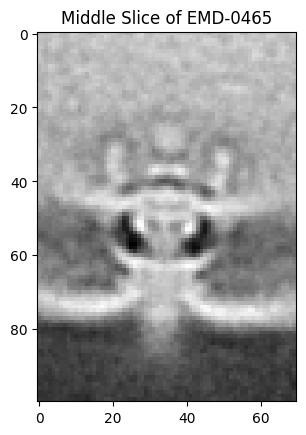

In [21]:
import requests
import gzip
import shutil
import mrcfile
import matplotlib.pyplot as plt

# Step 1: Download the dataset
url = 'https://ftp.ebi.ac.uk/pub/databases/emdb/structures/EMD-0465/map/emd_0465.map.gz'
response = requests.get(url)
if response.status_code == 200:
    with open('emd_0465.map.gz', 'wb') as file:
        file.write(response.content)
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Step 2: Extract the .gz file
with gzip.open('emd_0465.map.gz', 'rb') as f_in:
    with open('emd_0465.map', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Step 3: Load the map file
with mrcfile.open('emd_0465.map', permissive=True) as mrc:
    volume = mrc.data
    if volume is None:
        raise ValueError("Failed to load volume data from the map file.")

# Step 4: Visualize the middle slice
if volume is not None:
    plt.imshow(volume[volume.shape[0] // 2], cmap='gray')
    plt.title('Middle Slice of EMD-0465')
    plt.show()
else:
    print("Volume data is None. Cannot visualize.")


In [22]:
from scipy.ndimage import gaussian_filter

smoothed_volume = gaussian_filter(volume, sigma=1)


In [23]:
from skimage import filters

threshold = filters.threshold_otsu(smoothed_volume)
binary_volume = smoothed_volume > threshold


In [24]:
from scipy.ndimage import label

labeled_volume, num_features = label(binary_volume)
print(f'Number of features detected: {num_features}')


Number of features detected: 4


Region at z=34.488482611453946, y=36.455689486129536, x=34.7159841974739 with area=346780.0


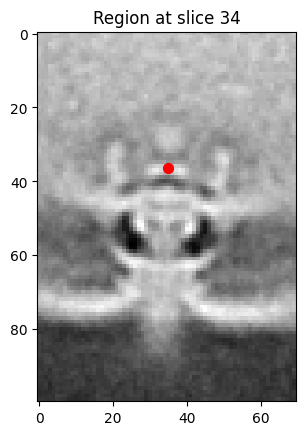

In [25]:
from skimage.measure import regionprops

regions = regionprops(labeled_volume)

for region in regions:
    if region.area > 100:  # Filter small regions
        z, y, x = region.centroid
        print(f'Region at z={z}, y={y}, x={x} with area={region.area}')
        # Visualize the region
        plt.imshow(volume[int(z)], cmap='gray')
        plt.scatter(x, y, c='red', s=50)
        plt.title(f'Region at slice {int(z)}')
        plt.show()
